Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8414 - loss: 0.4202 - val_accuracy: 0.8499 - val_loss: 0.3979
Epoch 2/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8467 - loss: 0.4010 - val_accuracy: 0.8495 - val_loss: 0.3955
Epoch 3/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8482 - loss: 0.3974 - val_accuracy: 0.8498 - val_loss: 0.3944
Epoch 4/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8480 - loss: 0.3952 - val_accuracy: 0.8496 - val_loss: 0.3963
Epoch 5/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8480 - loss: 0.3978 - val_accuracy: 0.8489 - val_loss: 0.3940
Epoch 6/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8487 - loss: 0.3945 - val_accuracy: 0.8498 - val_loss: 0.3941
Epoch 7/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8466 - loss: 0.3994 - val_accuracy: 0.8490 - val_loss: 0.3949
Epoch 8/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8490 - loss: 0.3949 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Accuracy: 0.8511
Validation Accuracy: 0.8487
Testing Accuracy: 0.8490

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.98      0.92     32055
     Class 1       0.00      0.00      0.00       695
     Class 2       0.58      0.14      0.23      5302

    accuracy                           0.85     38052
   macro avg       0.48      0.38      0.38     38052
weighted avg       0.80      0.85      0.80     38052



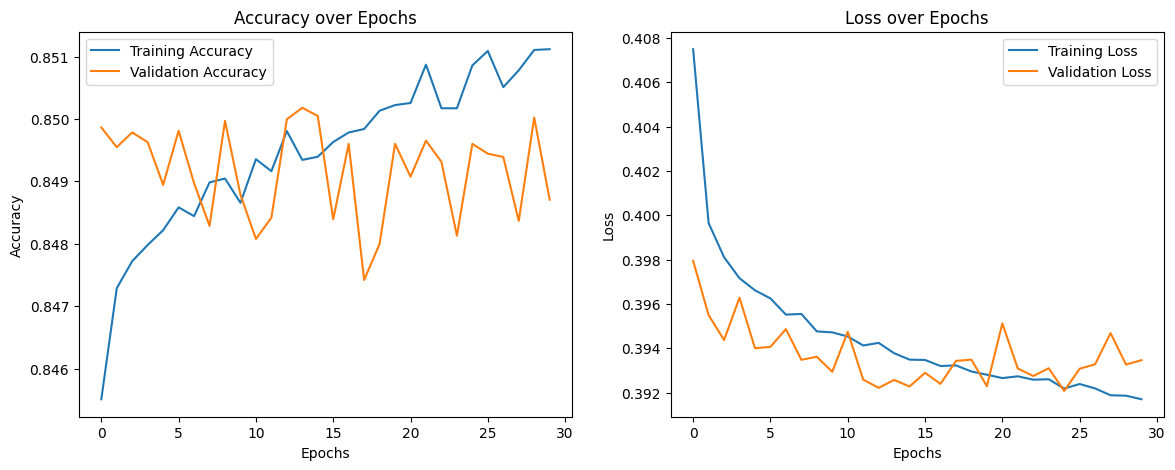

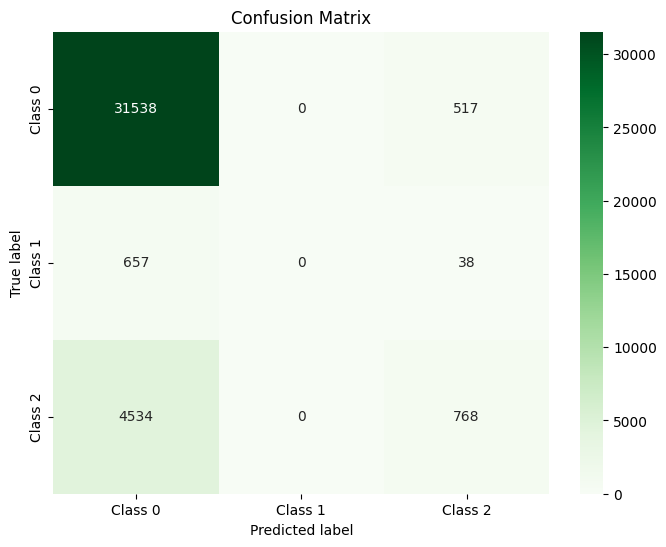

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = r'/content/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# One-hot encode the target variable
y_encoded = to_categorical(y)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp.argmax(axis=1))

# Build the DNN model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Generate classification report and confusion matrix
report = classification_report(y_test_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Display results
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Plot training and validation accuracy and loss
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
